In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from acquire import get_titanic_data
from prepare import train_validate_test_split

df = get_titanic_data()
df = df.drop(columns='deck')
df = df[~ df.age.isna()]
df = df[~ df.embarked.isna()]

#train, validate, test = train_validate_test_split(df)

In [5]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1


### Explore the target
- What are we trying to predict?

In [ ]:
#what would a cause of someone surviving the Titanic be??
df.survived.value_counts()

## Continuous vs Continious
- use .scatterplot
- try .regplot

## Continuous vs Discrete
- swarmplot
- violin plot
- catplot

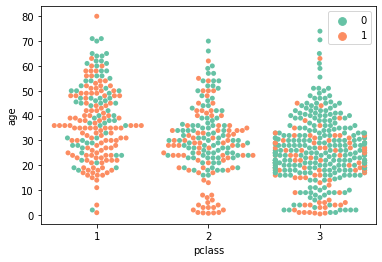

In [9]:
sns.swarmplot(x='pclass', y='age', data=df, hue='survived', palette='Set2')
plt.legend()
plt.show()

<AxesSubplot:xlabel='sex', ylabel='fare'>

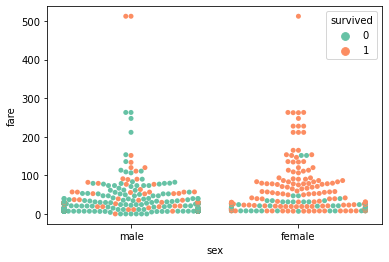

In [11]:
#show comparision between gender and ticket cost
sns.swarmplot(x='sex', y='fare', data=df, hue='survived', palette='Set2')

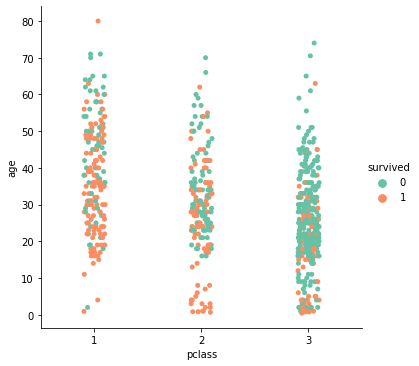

In [12]:
sns.catplot(x='pclass', y='age', data=df, hue='survived', palette='Set2')

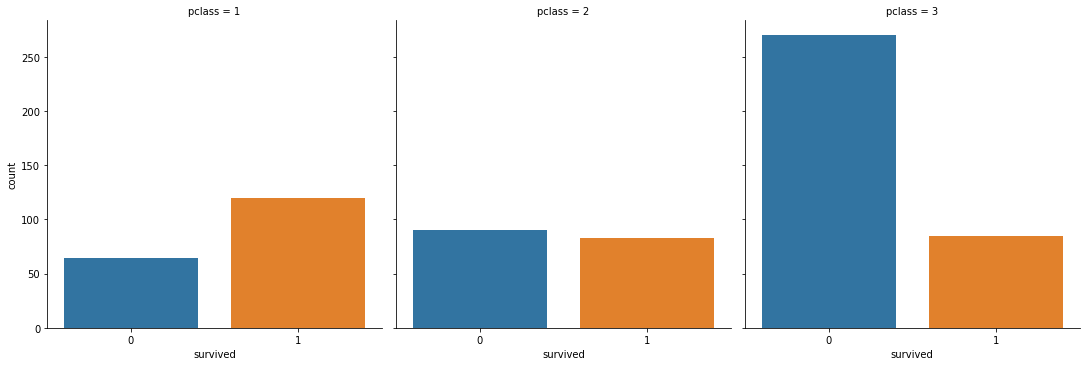

In [13]:
sns.catplot(x='survived', col='pclass', data=df, kind='count')

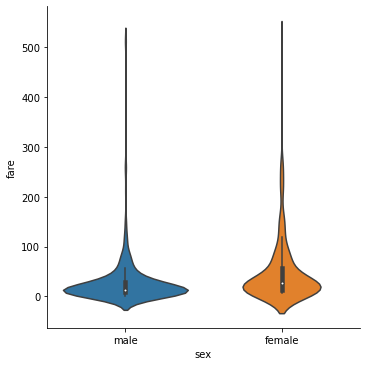

In [15]:
sns.catplot(x='sex', y='fare', data=df, kind='violin')

#### Violin plot:

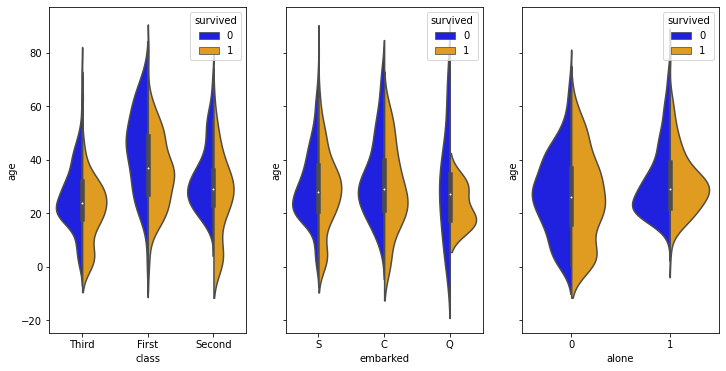

In [17]:
features = ['class', 'embarked', 'alone']
_, ax =plt.subplots(nrows=1, ncols=3, figsize=(12,6), sharey= True)

for i, feature in enumerate(features):
    sns.violinplot(
    feature,
    'age',
    hue='survived',
    data=df,
    split=True,
    ax=ax[i],
    palette=['blue', 'orange'])

## Discrete vs Discrete
- crosstab: matrix of counts or probabilities

In [18]:
pd.crosstab(df.pclass, df.survived, margins=True)

survived,0,1,All
pclass,,,
1,64,120,184
2,90,83,173
3,270,85,355
All,424,288,712


In [19]:
pd.crosstab(df.pclass, df.survived, margins=True, normalize=True)

survived,0,1,All
pclass,,,
1,0.089888,0.168539,0.258427
2,0.126404,0.116573,0.242978
3,0.379213,0.119382,0.498596
All,0.595506,0.404494,1.000000


<AxesSubplot:xlabel='survived', ylabel='pclass'>

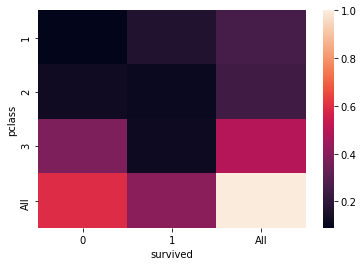

In [20]:
#make it more visual with a heatmap
crosstab = pd.crosstab(df.pclass, df.survived, margins=True, normalize=True)
sns.heatmap(crosstab)

## Continuous vs Continuous
- bivariate and multivariate
- use scatterplot or relplot

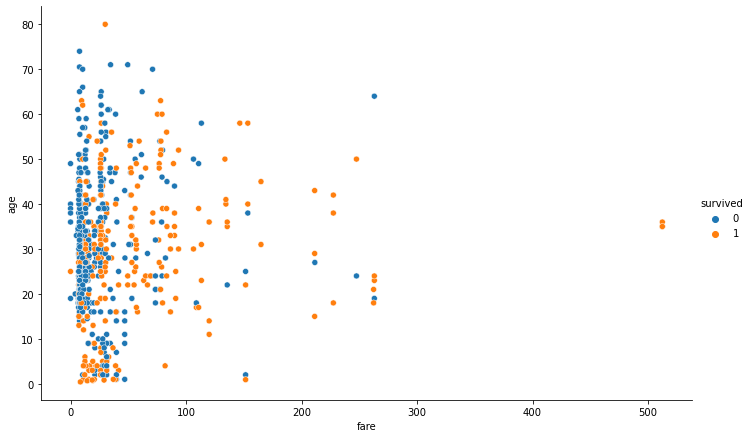

In [24]:
sns.relplot(x='fare', y='age', hue= 'survived', data=df, height=6, aspect=1.6)

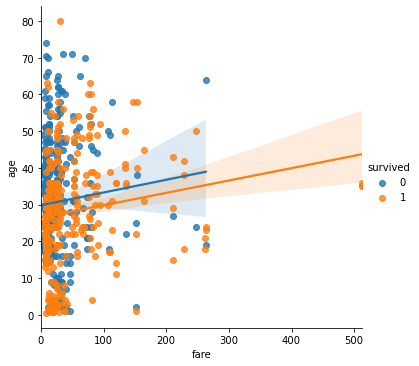

In [25]:
sns.lmplot(x='fare', y='age', hue= 'survived', data=df)

## Melting multiple continious variables

In [26]:
sns.set(style='whitegrid', palette='muted')

#melt the dataset to make it longer
melt= df[['survived', 'age', 'fare']].melt(id_vars='survived', var_name='measurement')

In [27]:
melt

,survived,measurement,value
0,0,age,22.000
1,1,age,38.000
2,1,age,26.000
3,1,age,35.000
4,0,age,35.000
...,...,...,...
1419,0,fare,29.125
1420,0,fare,13.000
1421,1,fare,30.000
1422,1,fare,30.000


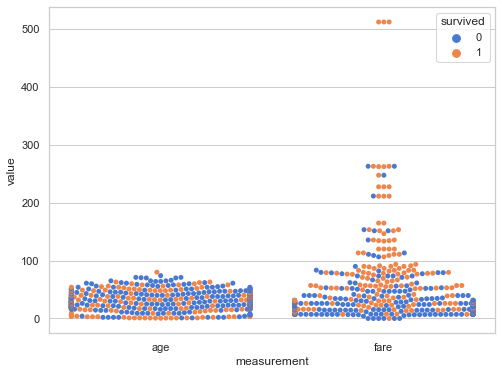

In [29]:
plt.figure(figsize=(8,6))
p= sns.swarmplot(
x='measurement',
y='value',
hue='survived',
data=melt)

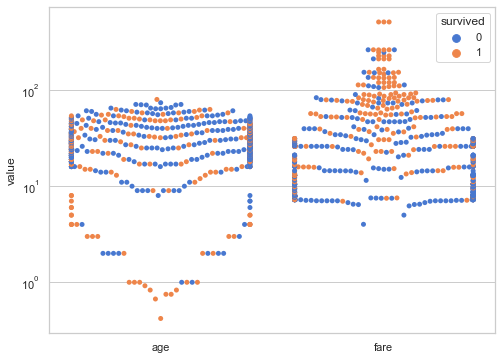

In [32]:
#setting to logscale
plt.figure(figsize=(8,6))
p= sns.swarmplot(
x='measurement',
y='value',
hue='survived',
data=melt)

p.set(yscale='log', xlabel='')
plt.show()

_____________________________

## Statistical Testing
- experiments should be **repoducible**
    - use the same random seed
    
- experiments should be **documented**
    - comment out your code

- T-Test: continuous variables
- Chi2: discete variable

### Example:
Experiment: Compare two groups: Is the age of survivors significantly different from that of the non-survivors?
- $H_{0}$: the difference in age between subset A, survivors, and subset B, non-survivors, is insubstantial (basically 0).
- $H_{a}$: the difference between subset A, survivors, and subset B, non-survivors is substantial

- Test if the observations with survivors (subset A) has significantly different ages than that of non-survivors (subset B).
- If there is a difference, then Age is a good choice to keep as a feature.
- We can use a t-test here, as Age is somewhat normally distributed.

In [33]:
#means testing - TTest
stats.ttest_ind(
df[df.survived == 1].age.dropna(),
df[df.survived == 0].age.dropna())

Ttest_indResult(statistic=-2.2043427748445956, pvalue=0.027820316250851285)